## Problem Set #4

MACS 30100, Dr. Evans 

Shuting Chen 

### 1. Multuple linear regression 

In [21]:
# Import packages 
import pandas as pd 
import numpy as np
import statsmodels.api as sm
import sklearn as sk
from sklearn import neighbors 
%matplotlib inline
import matplotlib.pyplot as plt 

#### (a). 

In [22]:
# Import data 
auto = pd.read_csv("Auto.csv", na_values = '?')
# Data cleaning 
auto = auto.dropna()
auto.head(15)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198.0,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215.0,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190.0,3850,8.5,70,1,amc ambassador dpl


#### (b).

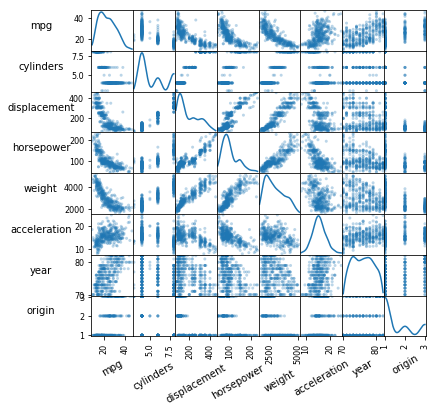

In [23]:
from pandas.plotting import scatter_matrix 
df_quant = auto.iloc[:,:-1]
s_m = scatter_matrix(df_quant, alpha=0.3, figsize=(6, 6), diagonal='kde')
[s.xaxis.label.set_rotation(30) for s in s_m.reshape(-1)]
[s.yaxis.label.set_rotation(0) for s in s_m.reshape(-1)]
[s.get_yaxis().set_label_coords(-1.2,0.5) for s in s_m.reshape(-1)]

plt.show()

#### (c). 

In [24]:
# This is the correlation matrix if the missing values have been dropped 
auto.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


#### (d).

In [25]:
# Add a cloumn of 1's to the dataset 
df_quant['const'] = 1
# Estimate the multiple linear regression model 
reg1 = sm.OLS(endog=df_quant['mpg'], exog=df_quant[['const', 'cylinders', 'displacement', \
                                                   'horsepower', 'weight', 'acceleration', \
                                                   'year', 'origin']], missing='drop')
results1 = reg1.fit()
print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.4
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          2.04e-139
Time:                        18:29:49   Log-Likelihood:                -1023.5
No. Observations:                 392   AIC:                             2063.
Df Residuals:                     384   BIC:                             2095.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.2184      4.644     -3.707   

The estimated regression model is: 
$$mpg_i = -17.2184\,-\,0.4934\,\hat{cylinders_i}\,+\,0.0199\,\hat{displacement_i}\,-\,0.0170\,\hat{horsepower_i}\,-\, $$
$$0.0065\,\hat{weight_i}\,+\,0.0806\,\hat{acceleration_i}\,+\,0.7508\,\hat{year_i}\,+\,1.4261\,\hat{origin_i}$$

$(i)$ The coefficients of $displacement_i$, $weight_i$, $year_i$ and $origin_i$ are statistically significant at $1\%$ level. Also, the estimate for the intercept is statistically significant at $1\%$ level.  

$(ii)$ The coefficients of $cylinders_i$, $horsepower_i$ and $acceleration_i$ are not statistically significant at $10\%$ level. 

$(iii)$ As the vehicle year increases by 1, miles per gallon is expected to increase by 0.75, on average. 

#### (e).  Multiple regression model with nonlinear terms  

Three variables that most likely have a nonlinear relationship with $mpg_i$: $displacement_i$, $horsepower_i$, and $weight_i$. 

##### (i). Estimate the new regression model by OLS

In [26]:
var = ['displacement', 'horsepower', 'weight', 'acceleration']
for i in var:
    df_quant['sq_' + i] = df_quant[i] ** 2

In [27]:
df_quant.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,const,sq_displacement,sq_horsepower,sq_weight,sq_acceleration
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,94249.0,16900.0,12278016,144.00
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,122500.0,27225.0,13638249,132.25
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,101124.0,22500.0,11806096,121.00
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,92416.0,22500.0,11785489,144.00
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,91204.0,19600.0,11895601,110.25


In [28]:
# Estimate the new regression model by OLS
reg2 = sm.OLS(endog=df_quant['mpg'], exog=df_quant[['const', 'cylinders', 'displacement', \
                                                   'horsepower', 'weight', 'acceleration', \
                                                   'year', 'origin', 'sq_displacement', \
                                                    'sq_horsepower', 'sq_weight', 'sq_acceleration']], missing='drop')
results2 = reg2.fit()
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     230.2
Date:                Sun, 04 Feb 2018   Prob (F-statistic):          1.75e-160
Time:                        18:29:49   Log-Likelihood:                -962.02
No. Observations:                 392   AIC:                             1948.
Df Residuals:                     380   BIC:                             1996.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              20.1084      6.696     

The new estimated regression model is: 
$$mpg_i = 20.1084\,+\,0.2519\,\hat{cylinders_i}\,-\,0.0169\,\hat{displacement_i}\,-\,0.1635\,\hat{horsepower_i}\,-\,
0.0136\,\hat{weight_i}\,-$$
$$\,2.0884\,\hat{acceleration_i}\,+\,0.7810\,\hat{year_i}\,+\,0.6104\,\hat{origin_i}\,+\,0.0000\,\hat{displacement_i^2}\,+\,0.0004\,\hat{horsepower_i}\,+$$
$$\,0.0000\,\hat{weight_i}\,+\,0.0576\,\hat{acceleration_i}$$

##### (ii). Adjusted R-squared 

In [29]:
print('The new adjusted R-squared: {}'.format(results2.rsquared_adj))
print('It is better than the adjusted R-squared from part (d), which is {}.'\
     .format(results1.rsquared_adj))

The new adjusted R-squared: 0.8657483569790392
It is better than the adjusted R-squared from part (d), which is 0.8182237705835792.


##### (iii). 
The coefficients of both $displacement_i$ and its squared term become very statistically insignificant. Specifically, the p-value for the coefficient of $displacement_i$ changes from 0.008 to 0.408.


##### (iv).
The coefficient of $cylinders_i$ becomes much more insignificant with p-value changing from 0.128 to 0.440. 

#### (f).  Compute the predicted value 

In [30]:
pred_value = results2.predict(exog=[1, 6, 200, 100, 3100, 15.1, 99, 1, \
                                    200**2, 100**2, 3100**2, 15.1**2])
print('The predicted miles per gallon is {:.6f}.'.format(pred_value[0]))

The predicted miles per gallon is 38.732111.


### 2. Classification problem: KNN by hand and in Python

#### (a). Compute the Euclidean distance 

In [31]:
d = {'X1':[0, 2, 0, 0, -1, 1], 'X2':[3, 0, 1, 1, 0, 1],'X3':[0, 0, 3, 2, 1, 1], 
     'Y':['Red', 'Red', 'Red', 'Green', 'Green', 'Red']}
knn_df = pd.DataFrame(data=d)
knn_df

,X1,X2,X3,Y
0,0,3,0,Red
1,2,0,0,Red
2,0,1,3,Red
3,0,1,2,Green
4,-1,0,1,Green
5,1,1,1,Red


In [32]:
knn_df['Distance'] = (knn_df['X1']**2 + knn_df['X2']**2 + knn_df['X3']**2)**0.5
knn_df

,X1,X2,X3,Y,Distance
0,0,3,0,Red,3.000000
1,2,0,0,Red,2.000000
2,0,1,3,Red,3.162278
3,0,1,2,Green,2.236068
4,-1,0,1,Green,1.414214
5,1,1,1,Red,1.732051


#### (b).  KNN prediction with K = 1
Since K = 1, we should choose one observation that is closest to the test observation (0, 0, 0). Based on the Euclidean distances shown above, the observation (-1, 0, 1) has the smallest distance to (0, 0, 0). Therefore, the KNN prediction for Y is $\textit{Green}$, which is same as the value of Y for the chosen observation. 

#### (c). KNN prediction with K = 3
Since K = 3, we need to select three observations that are closest to (0, 0, 0). Therefore, we choose observations (-1, 0, 1), (1, 1, 1) and (2, 0, 0), two of which have the value of Y as Red. Thus, the KNN prediction for Y of (0, 0, 0) is $\textit{Red}$ when K = 3.  

#### (d). 
I would expect the best value of K to be small since the Bayes decision boundary is highly non-linear. As K goes up, the KNN method becomes less flexible and produces a decsion boundary close to linear. Thus, a smaller value of K should be better. 

#### (e). 

In [33]:
y = knn_df.Y
x = np.column_stack((knn_df['X1'], knn_df['X2'], knn_df['X3']))
knn_2 = sk.neighbors.KNeighborsClassifier(n_neighbors=2)
results3 = knn_2.fit(x, y)
print(results3.predict([[1,1,1]]))
print(knn_2.kneighbors([[1,1,1]]))

['Green']
(array([[ 0.        ,  1.41421356]]), array([[5, 3]]))


When K = 2, observations (1, 1, 1) with row index 5 and (0, 1, 2) with row index 3 are closest to the test observation (1, 1, 1). The KNN prediction for Y of the test point is $\textit{Green}$. 

### 3. Multivariable logistic (logit) regression

In [34]:
auto_2 = auto.iloc[:,:-1]
auto_2['const'] = 1
median_mpg = auto_2.mpg.median()
auto_2['mpg_high'] = auto_2.mpg.apply(lambda x: 1 if x>= median_mpg else 0)
auto_2.head(25)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,const,mpg_high
0,18.0,8,307.0,130.0,3504,12.0,70,1,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,1,0
5,15.0,8,429.0,198.0,4341,10.0,70,1,1,0
6,14.0,8,454.0,220.0,4354,9.0,70,1,1,0
7,14.0,8,440.0,215.0,4312,8.5,70,1,1,0
8,14.0,8,455.0,225.0,4425,10.0,70,1,1,0
9,15.0,8,390.0,190.0,3850,8.5,70,1,1,0


#### (a). 

In [35]:
y = auto_2.mpg_high
X = pd.concat((auto_2.const, auto_2.loc[:,'cylinders':'origin']), axis = 1)
LogitModel = sm.Logit(y, X, missing = 'drop')
results4 = LogitModel.fit()
print(results4.summary())

Optimization terminated successfully.
         Current function value: 0.200944
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:               mpg_high   No. Observations:                  392
Model:                          Logit   Df Residuals:                      384
Method:                           MLE   Df Model:                            7
Date:                Sun, 04 Feb 2018   Pseudo R-squ.:                  0.7101
Time:                        18:29:50   Log-Likelihood:                -78.770
converged:                       True   LL-Null:                       -271.71
                                        LLR p-value:                 2.531e-79
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -17.1549      5.764     -2.976      0.003     -28.452      -5.858
cylinders       -0.1626

Coefficients of $\textit{weight}$ and $\textit{year}$ are statistically significant at the $5\%$ level. 

#### (b). 

In [36]:
from sklearn.cross_validation import train_test_split
X_new = auto_2.loc[:,'cylinders':'origin']
y = auto_2.mpg_high
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size = 0.5, random_state=10)

#### (c). 

In [37]:
from sklearn.linear_model import LogisticRegression
LogReg = LogisticRegression()
LogReg.fit(X_train, y_train)
print('The estimated intercept is {}.'.format(LogReg.intercept_[0]))

The estimated intercept is -0.06994943054581065.


In [38]:
print('The estimated coefficients are: {}, {}, {}, {}, {}, {} and {}'.\
      format(LogReg.coef_[0][0], LogReg.coef_[0][1], \
             LogReg.coef_[0][2], LogReg.coef_[0][3], \
             LogReg.coef_[0][4], LogReg.coef_[0][5], \
             LogReg.coef_[0][6]))

The estimated coefficients are: -0.6709040220129964, 0.005916087215492787, -0.038425563478720705, -0.005022398937311777, -0.1390440532940531, 0.2991400731379187 and -0.1531648487530395


#### (d). 

In [39]:
from sklearn.metrics import confusion_matrix,classification_report
y_pred = LogReg.predict(X_test)
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[86, 13],
       [12, 85]])

In [40]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.88      0.87      0.87        99
          1       0.87      0.88      0.87        97

avg / total       0.87      0.87      0.87       196



Since the predictions for low mpg and high mpg are quite similar, we can say that this model predicts low mpg and high mpg at same quality. 